In [128]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('credit.csv')
df

,sexo,renda,renda_conjunta,tempo,regiao,A6,item,prestacao_mensal,empregado,estado_civil,A11,graduado,A13,A14,emprestimo,aprovacao
0,0,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,1,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,1,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,0,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,0,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,y,p,e,h,1.25,False,False,0,False,g,260.0,0,0
686,1,22.67,0.750,u,g,c,v,2.00,False,True,2,True,g,200.0,394,0
687,1,25.25,13.500,y,p,ff,ff,2.00,False,True,1,True,g,200.0,1,0
688,0,17.92,0.205,u,g,aa,v,0.04,False,False,0,False,g,280.0,750,0


In [129]:
#Substituindo caracteres por números nos atributos explicativos
df['empregado']= df['empregado'].astype(int)
df['estado_civil']= df['estado_civil'].astype(int)
df

,sexo,renda,renda_conjunta,tempo,regiao,A6,item,prestacao_mensal,empregado,estado_civil,A11,graduado,A13,A14,emprestimo,aprovacao
0,0,30.83,0.000,u,g,w,v,1.25,1,1,1,False,g,202.0,0,1
1,1,58.67,4.460,u,g,q,h,3.04,1,1,6,False,g,43.0,560,1
2,1,24.50,0.500,u,g,q,h,1.50,1,0,0,False,g,280.0,824,1
3,0,27.83,1.540,u,g,w,v,3.75,1,1,5,True,g,100.0,3,1
4,0,20.17,5.625,u,g,w,v,1.71,1,0,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,y,p,e,h,1.25,0,0,0,False,g,260.0,0,0
686,1,22.67,0.750,u,g,c,v,2.00,0,1,2,True,g,200.0,394,0
687,1,25.25,13.500,y,p,ff,ff,2.00,0,1,1,True,g,200.0,1,0
688,0,17.92,0.205,u,g,aa,v,0.04,0,0,0,False,g,280.0,750,0


In [130]:
#Resolvendo problema de regressão usando o Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#Separando atributos explicativos e o atributo TARGET
X = df[['sexo', 'renda', 'renda_conjunta', 'empregado', 'estado_civil', 'emprestimo']]
y = df.aprovacao
X.shape, y.shape

#Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinar o modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#Prever o modelo
y_pred = rf_model.predict(X_test)

#Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.1960144927536232


In [132]:
#Calculo da Erro Medio Quadratico com o Random Forest
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1243876811594203


In [133]:
#Calculo da Acuracia do Random Forest
accuracy_rf = accuracy_score(y_test, y_pred.round())
print(f'Acurácia do Random Forest: {accuracy_rf}')

Acurácia do Random Forest: 0.8478260869565217


In [134]:
#Calculo do coeficiente de determinacao de Random Forest
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente quadratico do Random Forest: {r2}')

Coeficiente quadratico do Random Forest: 0.5023447478991596


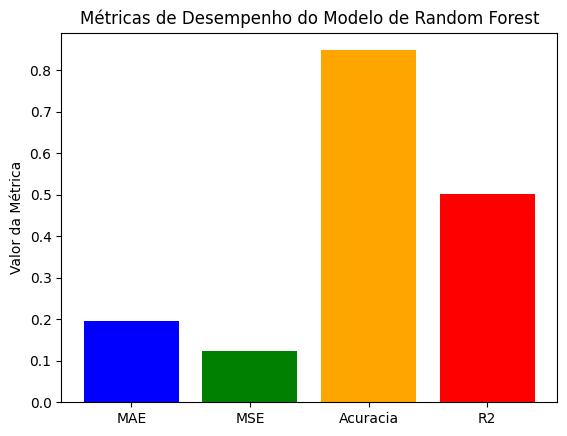

In [135]:
# Gráfico de Barras para as Métricas do Random Forest
metrics_names = ['MAE', 'MSE', 'Acuracia', 'R2']
metrics_values = [mae, mse, accuracy_rf, r2]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Métricas de Desempenho do Modelo de Random Forest')
plt.ylabel('Valor da Métrica')
plt.show()

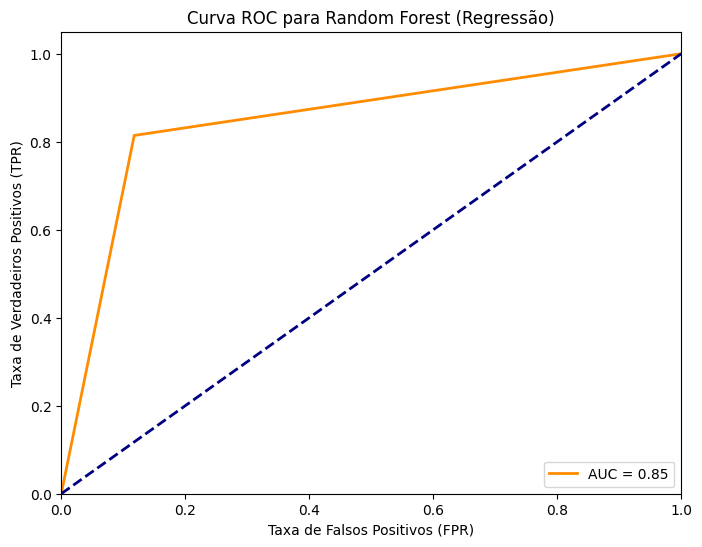

In [136]:
from sklearn.metrics import roc_curve, auc

#Curva de ROC do Random FOrest
# Definir um limiar de probabilidade
threshold = 0.5

# Converter as previsões em rótulos binários usando o limiar
y_pred_binary = np.where(y_pred > threshold, 1, 0)

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para Random Forest')
plt.legend(loc="lower right")
plt.show()

In [137]:
X

,sexo,renda,renda_conjunta,empregado,estado_civil,emprestimo
0,0,30.83,0.000,1,1,0
1,1,58.67,4.460,1,1,560
2,1,24.50,0.500,1,0,824
3,0,27.83,1.540,1,1,3
4,0,20.17,5.625,1,0,0
...,...,...,...,...,...,...
685,0,21.08,10.085,0,0,0
686,1,22.67,0.750,0,1,394
687,1,25.25,13.500,0,1,1
688,0,17.92,0.205,0,0,750


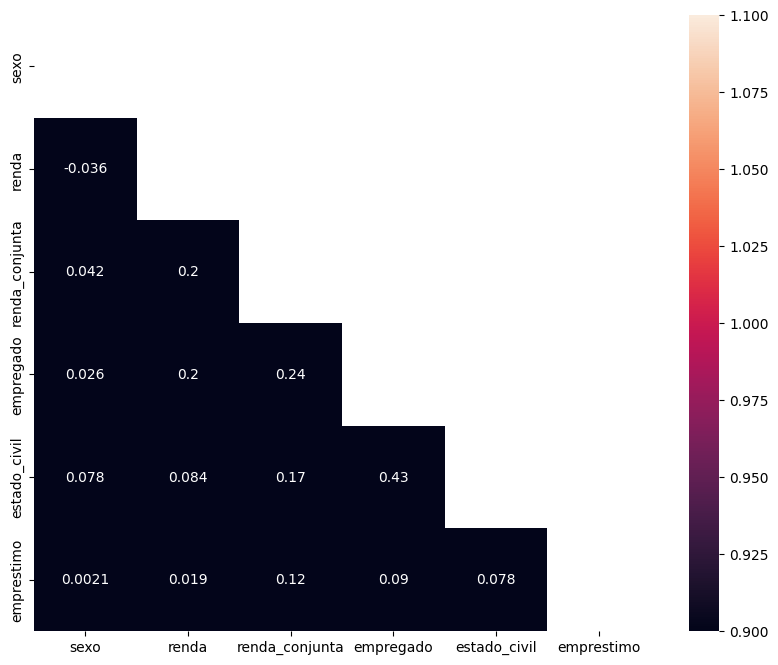

In [138]:
#Matriz de correlacao
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool_))
plt.figure(figsize=(10, 8))
sb.heatmap(X.corr(), mask=mask, square=True, annot=True, vmin=1, vmax=1)
plt.show()

In [139]:
#Criando um conjunto de dados com valores aleatórios para testar o Random Forest
dados_teste = pd.DataFrame({
    'sexo': np.random.choice([0, 1], size=10),
    'renda': np.random.uniform(10, 60, size=10),
    'renda_conjunta': np.random.uniform(1000, 2500, size=10),
    'empregado': np.random.choice([0, 1], size=10),
    'estado_civil': np.random.choice([0, 1], size=10),
    'emprestimo': np.random.uniform(0, 900, size=10),
})

#Fazer previsões sobre os dados de teste
dados_rf = dados_teste.copy()
probabilidade_aprovacao = rf_model.predict(dados_rf)

#Adicionar a probabilidade de aprovação de crédito
dados_rf['probabilidade_aprovacao'] = probabilidade_aprovacao

dados_rf

,sexo,renda,renda_conjunta,empregado,estado_civil,emprestimo,probabilidade_aprovacao
0,0,44.514184,1248.009806,0,1,791.562930,0.26
1,0,13.211357,2133.644639,0,0,890.599020,0.28
2,1,30.304952,1302.277475,1,0,709.425923,0.97
3,0,42.205049,1475.601613,0,1,807.906407,0.26
4,1,37.349082,2210.933878,0,0,408.559481,0.31
5,0,57.467476,1390.904284,0,1,753.788246,0.26
6,1,42.664962,1102.018285,1,0,220.633813,0.31
7,0,35.715554,2276.525717,1,1,114.936526,0.35
8,0,41.829666,1519.630030,1,1,473.463130,0.71
9,0,59.223273,1919.182961,0,0,82.806029,0.26


In [140]:
#Resolvendo problema de regressão usando o K-NN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#Vamos normalizar os dados, pois o K-NN é muito sensível à escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do Modelo K-NN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Prever o modelo
y_pred = knn_model.predict(X_test_scaled)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.2217391304347826


In [141]:
#Calculo da Erro Medio Quadratico com o K-NN
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.12724637681159423


In [142]:
#Calculo da acuracia do K-NN
accuracy_rf = accuracy_score(y_test, y_pred.round())
print(f'Acurácia do K-NN: {accuracy_rf}')

Acurácia do K-NN: 0.8333333333333334


In [143]:
#Calculo do coeficiente de determinacao de K-NN 
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente quadratico de K-NN: {r2}')

Coeficiente quadratico de K-NN: 0.49090756302521


In [146]:
#Fazer previsões com o K-NN sobre os dados de teste
dados_knn = dados_teste.copy()
dados_teste_scaled = scaler.transform(dados_knn)
probabilidade_aprovacao = knn_model.predict(dados_teste_scaled)

#Adicionar a probabilidade de aprovação de crédito
dados_knn['probabilidade_aprovacao'] = probabilidade_aprovacao

dados_knn

,sexo,renda,renda_conjunta,empregado,estado_civil,emprestimo,probabilidade_aprovacao
0,0,44.514184,1248.009806,0,1,791.562930,0.6
1,0,13.211357,2133.644639,0,0,890.599020,0.6
2,1,30.304952,1302.277475,1,0,709.425923,0.6
3,0,42.205049,1475.601613,0,1,807.906407,0.6
4,1,37.349082,2210.933878,0,0,408.559481,0.6
5,0,57.467476,1390.904284,0,1,753.788246,0.6
6,1,42.664962,1102.018285,1,0,220.633813,0.6
7,0,35.715554,2276.525717,1,1,114.936526,0.6
8,0,41.829666,1519.630030,1,1,473.463130,0.6
9,0,59.223273,1919.182961,0,0,82.806029,0.6


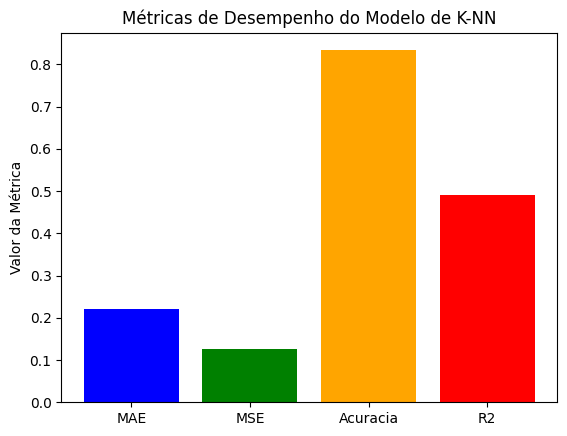

In [147]:
# Gráfico de Barras para as Métricas do K-NN
metrics_names = ['MAE', 'MSE', 'Acuracia', 'R2']
metrics_values = [mae, mse, accuracy_rf, r2]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Métricas de Desempenho do Modelo de K-NN')
plt.ylabel('Valor da Métrica')
plt.show()

In [148]:
#Resolvendo problema de regressão usando Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

#Treinamento do modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

#Prever o modelo
y_pred = tree_model.predict(X_test)

#Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.16666666666666666


In [149]:
#Calculo da Erro Medio Quadratico com Decision Tree
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.16666666666666666


In [150]:
#Calculo da acuracia da Arvore de Decisao
accuracy_rf = accuracy_score(y_test, y_pred.round())
print(f'Acurácia de Decision Tree : {accuracy_rf}')

Acurácia de Decision Tree : 0.8333333333333334


In [151]:
#Calculo do coeficiente de determinacao de Decision Tree
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente quadratico de Decision Tree: {r2}')

Coeficiente quadratico de Decision Tree: 0.3331932773109244


In [152]:
#Visualização da Árvore
tree_rules = export_text(tree_model, feature_names=X.columns.tolist())
print(tree_rules)

|--- empregado <= 0.50
|   |--- renda_conjunta <= 0.17
|   |   |--- renda <= 35.67
|   |   |   |--- emprestimo <= 20.50
|   |   |   |   |--- renda <= 23.12
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- renda >  23.12
|   |   |   |   |   |--- renda <= 28.57
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- renda >  28.57
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- emprestimo >  20.50
|   |   |   |   |--- renda <= 21.29
|   |   |   |   |   |--- renda_conjunta <= 0.11
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- renda_conjunta >  0.11
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- renda >  21.29
|   |   |   |   |   |--- value: [0.00]
|   |   |--- renda >  35.67
|   |   |   |--- sexo <= 0.50
|   |   |   |   |--- value: [1.00]
|   |   |   |--- sexo >  0.50
|   |   |   |   |--- renda <= 62.46
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- renda >  62.46
|   |   |   |   |   |--- value: [1.00]


In [153]:
#Fazer previsões sobre os dados de teste
dados_dt = dados_teste.copy()
probabilidade_aprovacao = tree_model.predict(dados_dt)

#Adicionar a probabilidade de aprovação de crédito
dados_dt['probabilidade_aprovacao'] = probabilidade_aprovacao

dados_dt

,sexo,renda,renda_conjunta,empregado,estado_civil,emprestimo,probabilidade_aprovacao
0,0,44.514184,1248.009806,0,1,791.562930,1.0
1,0,13.211357,2133.644639,0,0,890.599020,1.0
2,1,30.304952,1302.277475,1,0,709.425923,1.0
3,0,42.205049,1475.601613,0,1,807.906407,1.0
4,1,37.349082,2210.933878,0,0,408.559481,1.0
5,0,57.467476,1390.904284,0,1,753.788246,1.0
6,1,42.664962,1102.018285,1,0,220.633813,0.0
7,0,35.715554,2276.525717,1,1,114.936526,0.0
8,0,41.829666,1519.630030,1,1,473.463130,1.0
9,0,59.223273,1919.182961,0,0,82.806029,1.0


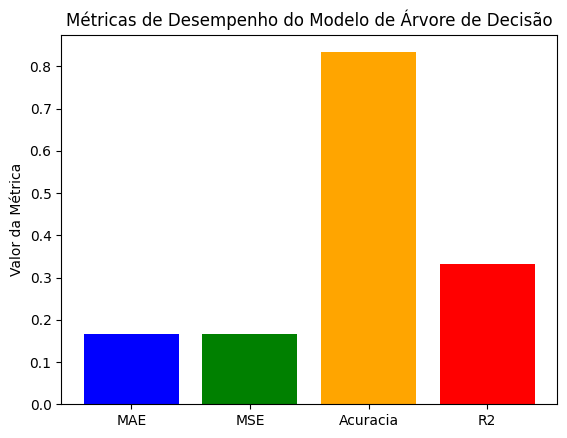

In [154]:
# Gráfico de Barras para as Métricas da Decision Tree
metrics_names = ['MAE', 'MSE', 'Acuracia', 'R2']
metrics_values = [mae, mse, accuracy_rf, r2]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Métricas de Desempenho do Modelo de Árvore de Decisão')
plt.ylabel('Valor da Métrica')
plt.show()